In [384]:
!pip install plotnine

In [385]:
!pip install imblearn

In [386]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from plotnine import *

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import DBSCAN


from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

%matplotlib inline

In [387]:
data = pd.read_csv("C:/Users/somay/Downloads/train/train.csv")
data

,ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,y
0,0,58238,971.303,397.202654,186.945510,2.124697,0.882317,58977,272.306674,0.604756,0.987470,0.775723,0.685561,0.006820,0.000929,0.469994,0.998595,HOROZ
1,1,44515,757.601,265.590470,213.967453,1.241266,0.592420,44780,238.071960,0.771745,0.994082,0.974620,0.896387,0.005966,0.002376,0.803510,0.997370,SEKER
2,2,31662,653.783,239.902428,168.421505,1.424417,0.712136,32034,200.781748,0.801407,0.988387,0.930853,0.836931,0.007577,0.002293,0.700453,0.997737,DERMASON
3,3,38778,734.020,268.446281,184.061923,1.458456,0.727925,39208,222.201897,0.766137,0.989033,0.904439,0.827733,0.006923,0.002005,0.685142,0.999250,DERMASON
4,4,42530,775.403,281.212824,193.236878,1.455275,0.726511,43028,232.703412,0.729816,0.988426,0.888895,0.827499,0.006612,0.001912,0.684755,0.996507,SIRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10829,10829,37777,716.007,250.174662,192.704033,1.298233,0.637708,38174,219.315230,0.770519,0.989600,0.925983,0.876648,0.006622,0.002413,0.768513,0.997708,SEKER
10830,10830,32187,667.621,247.778775,165.786862,1.494562,0.743179,32582,202.439525,0.731805,0.987877,0.907466,0.817017,0.007698,0.002116,0.667517,0.997646,DERMASON
10831,10831,81837,1095.937,433.838186,241.527026,1.796230,0.830699,82554,322.797312,0.771996,0.991315,0.856226,0.744050,0.005301,0.001002,0.553610,0.994412,CALI
10832,10832,48212,826.362,309.639462,199.285811,1.553746,0.765357,48777,247.760822,0.677002,0.988417,0.887206,0.800159,0.006422,0.001624,0.640255,0.994793,SIRA


In [388]:
test = pd.read_csv("C:/Users/somay/Downloads\/train/test.csv")

test

,ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,10834,57659,955.434,387.757607,196.625782,1.972059,0.861896,60188,270.949661,0.620790,0.957982,0.793735,0.698760,0.006725,0.000989,0.488266,0.962889
1,10835,28772,630.362,229.990785,159.609367,1.440960,0.719993,29127,191.399185,0.767458,0.987812,0.909913,0.832204,0.007994,0.002365,0.692563,0.997956
2,10836,54677,911.022,308.853903,226.398571,1.364204,0.680198,55858,263.850182,0.753013,0.978857,0.827860,0.854288,0.005649,0.001856,0.729808,0.995607
3,10837,24827,578.304,214.192699,147.788172,1.449322,0.723831,25121,177.794033,0.716508,0.988297,0.932871,0.830066,0.008627,0.002526,0.689009,0.998596
4,10838,141850,1432.847,524.923471,346.910920,1.513136,0.750492,143680,424.981211,0.804617,0.987263,0.868240,0.809606,0.003701,0.000981,0.655462,0.991803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2704,13538,66833,1018.336,400.397077,214.346215,1.867992,0.844640,67787,291.709476,0.759604,0.985927,0.809876,0.728550,0.005991,0.001041,0.530786,0.991504
2705,13539,40572,725.331,250.714014,206.471935,1.214276,0.567264,40900,227.283688,0.767479,0.991980,0.969089,0.906546,0.006179,0.002574,0.821825,0.997923
2706,13540,61226,1008.378,408.227467,199.385082,2.047432,0.872611,63901,279.204879,0.611648,0.958138,0.756657,0.683944,0.006668,0.000900,0.467780,0.957748
2707,13541,34238,698.847,255.829224,170.867099,1.497241,0.744255,34724,208.789788,0.724890,0.986004,0.880956,0.816130,0.007472,0.002045,0.666067,0.997263


In [389]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10834 entries, 0 to 10833
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10834 non-null  int64  
 1   Area             10834 non-null  int64  
 2   Perimeter        10834 non-null  float64
 3   MajorAxisLength  10834 non-null  float64
 4   MinorAxisLength  10834 non-null  float64
 5   AspectRation     10834 non-null  float64
 6   Eccentricity     10834 non-null  float64
 7   ConvexArea       10834 non-null  int64  
 8   EquivDiameter    10834 non-null  float64
 9   Extent           10834 non-null  float64
 10  Solidity         10834 non-null  float64
 11  roundness        10834 non-null  float64
 12  Compactness      10834 non-null  float64
 13  ShapeFactor1     10834 non-null  float64
 14  ShapeFactor2     10834 non-null  float64
 15  ShapeFactor3     10834 non-null  float64
 16  ShapeFactor4     10834 non-null  float64
 17  y           

In [390]:
print(data.columns)
print(data.index)
print(data.values)


Index(['ID', 'Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'y'],
      dtype='object')
RangeIndex(start=0, stop=10834, step=1)
[[0 58238 971.303 ... 0.4699939717666176 0.9985950088358464 'HOROZ']
 [1 44515 757.601 ... 0.8035104366666684 0.9973699821378832 'SEKER']
 [2 31662 653.7830000000001 ... 0.7004532870310671 0.9977374579620564
  'DERMASON']
 ...
 [10831 81837 1095.937 ... 0.5536104367878766 0.9944118926806816 'CALI']
 [10832 48212 826.3620000000001 ... 0.640254526594677 0.9947926877983206
  'SIRA']
 [10833 28026 610.943 ... 0.7687622900307359 0.9993171271748076
  'DERMASON']]


In [391]:
print(data.isnull().sum())
data = data.dropna(axis = 0)
data

ID                 0
Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
y                  0
dtype: int64


,ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,y
0,0,58238,971.303,397.202654,186.945510,2.124697,0.882317,58977,272.306674,0.604756,0.987470,0.775723,0.685561,0.006820,0.000929,0.469994,0.998595,HOROZ
1,1,44515,757.601,265.590470,213.967453,1.241266,0.592420,44780,238.071960,0.771745,0.994082,0.974620,0.896387,0.005966,0.002376,0.803510,0.997370,SEKER
2,2,31662,653.783,239.902428,168.421505,1.424417,0.712136,32034,200.781748,0.801407,0.988387,0.930853,0.836931,0.007577,0.002293,0.700453,0.997737,DERMASON
3,3,38778,734.020,268.446281,184.061923,1.458456,0.727925,39208,222.201897,0.766137,0.989033,0.904439,0.827733,0.006923,0.002005,0.685142,0.999250,DERMASON
4,4,42530,775.403,281.212824,193.236878,1.455275,0.726511,43028,232.703412,0.729816,0.988426,0.888895,0.827499,0.006612,0.001912,0.684755,0.996507,SIRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10829,10829,37777,716.007,250.174662,192.704033,1.298233,0.637708,38174,219.315230,0.770519,0.989600,0.925983,0.876648,0.006622,0.002413,0.768513,0.997708,SEKER
10830,10830,32187,667.621,247.778775,165.786862,1.494562,0.743179,32582,202.439525,0.731805,0.987877,0.907466,0.817017,0.007698,0.002116,0.667517,0.997646,DERMASON
10831,10831,81837,1095.937,433.838186,241.527026,1.796230,0.830699,82554,322.797312,0.771996,0.991315,0.856226,0.744050,0.005301,0.001002,0.553610,0.994412,CALI
10832,10832,48212,826.362,309.639462,199.285811,1.553746,0.765357,48777,247.760822,0.677002,0.988417,0.887206,0.800159,0.006422,0.001624,0.640255,0.994793,SIRA


In [392]:
data['y'].value_counts()

DERMASON    2837
SIRA        2109
SEKER       1621
HOROZ       1488
CALI        1304
BARBUNYA    1057
BOMBAY       418
Name: y, dtype: int64

In [393]:
data.describe()

,ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000
mean,5416.500000,53095.675189,855.274892,320.036169,202.410342,1.581294,0.750588,53816.205926,253.123583,0.749937,0.987152,0.873647,0.800244,0.006559,0.001718,0.644139,0.995083
std,3127.650742,29542.542580,214.991122,85.961630,45.113965,0.244314,0.091481,29999.710739,59.433080,0.048949,0.004626,0.059344,0.061228,0.001127,0.000593,0.098268,0.004306
min,0.000000,20420.000000,524.932000,183.601165,129.576207,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.645368,0.002856,0.000564,0.416499,0.947687
25%,2708.250000,36343.500000,703.601250,253.501071,175.927024,1.432985,0.716250,36731.250000,215.113880,0.718778,0.985627,0.833479,0.763378,0.005888,0.001161,0.582747,0.993690
50%,5416.500000,44645.000000,793.739500,296.377365,192.525040,1.550761,0.764314,45148.000000,238.419335,0.760141,0.988290,0.883472,0.801428,0.006643,0.001700,0.642287,0.996397
75%,8124.750000,61295.000000,975.517500,376.068399,217.315195,1.703029,0.809450,62251.500000,279.362162,0.786871,0.990014,0.916883,0.834068,0.007268,0.002169,0.695670,0.997895
max,10833.000000,254616.000000,1985.370000,738.860153,450.926187,2.388873,0.908167,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.009897,0.003665,0.974767,0.999733


In [394]:
#data = data.drop("ID", axis='columns')


In [395]:
data

,ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,y
0,0,58238,971.303,397.202654,186.945510,2.124697,0.882317,58977,272.306674,0.604756,0.987470,0.775723,0.685561,0.006820,0.000929,0.469994,0.998595,HOROZ
1,1,44515,757.601,265.590470,213.967453,1.241266,0.592420,44780,238.071960,0.771745,0.994082,0.974620,0.896387,0.005966,0.002376,0.803510,0.997370,SEKER
2,2,31662,653.783,239.902428,168.421505,1.424417,0.712136,32034,200.781748,0.801407,0.988387,0.930853,0.836931,0.007577,0.002293,0.700453,0.997737,DERMASON
3,3,38778,734.020,268.446281,184.061923,1.458456,0.727925,39208,222.201897,0.766137,0.989033,0.904439,0.827733,0.006923,0.002005,0.685142,0.999250,DERMASON
4,4,42530,775.403,281.212824,193.236878,1.455275,0.726511,43028,232.703412,0.729816,0.988426,0.888895,0.827499,0.006612,0.001912,0.684755,0.996507,SIRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10829,10829,37777,716.007,250.174662,192.704033,1.298233,0.637708,38174,219.315230,0.770519,0.989600,0.925983,0.876648,0.006622,0.002413,0.768513,0.997708,SEKER
10830,10830,32187,667.621,247.778775,165.786862,1.494562,0.743179,32582,202.439525,0.731805,0.987877,0.907466,0.817017,0.007698,0.002116,0.667517,0.997646,DERMASON
10831,10831,81837,1095.937,433.838186,241.527026,1.796230,0.830699,82554,322.797312,0.771996,0.991315,0.856226,0.744050,0.005301,0.001002,0.553610,0.994412,CALI
10832,10832,48212,826.362,309.639462,199.285811,1.553746,0.765357,48777,247.760822,0.677002,0.988417,0.887206,0.800159,0.006422,0.001624,0.640255,0.994793,SIRA


In [396]:
data.describe()

,ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000
mean,5416.500000,53095.675189,855.274892,320.036169,202.410342,1.581294,0.750588,53816.205926,253.123583,0.749937,0.987152,0.873647,0.800244,0.006559,0.001718,0.644139,0.995083
std,3127.650742,29542.542580,214.991122,85.961630,45.113965,0.244314,0.091481,29999.710739,59.433080,0.048949,0.004626,0.059344,0.061228,0.001127,0.000593,0.098268,0.004306
min,0.000000,20420.000000,524.932000,183.601165,129.576207,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.645368,0.002856,0.000564,0.416499,0.947687
25%,2708.250000,36343.500000,703.601250,253.501071,175.927024,1.432985,0.716250,36731.250000,215.113880,0.718778,0.985627,0.833479,0.763378,0.005888,0.001161,0.582747,0.993690
50%,5416.500000,44645.000000,793.739500,296.377365,192.525040,1.550761,0.764314,45148.000000,238.419335,0.760141,0.988290,0.883472,0.801428,0.006643,0.001700,0.642287,0.996397
75%,8124.750000,61295.000000,975.517500,376.068399,217.315195,1.703029,0.809450,62251.500000,279.362162,0.786871,0.990014,0.916883,0.834068,0.007268,0.002169,0.695670,0.997895
max,10833.000000,254616.000000,1985.370000,738.860153,450.926187,2.388873,0.908167,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.009897,0.003665,0.974767,0.999733


array([[<AxesSubplot:title={'center':'ID'}>,
        <AxesSubplot:title={'center':'Area'}>,
        <AxesSubplot:title={'center':'Perimeter'}>,
        <AxesSubplot:title={'center':'MajorAxisLength'}>],
       [<AxesSubplot:title={'center':'MinorAxisLength'}>,
        <AxesSubplot:title={'center':'AspectRation'}>,
        <AxesSubplot:title={'center':'Eccentricity'}>,
        <AxesSubplot:title={'center':'ConvexArea'}>],
       [<AxesSubplot:title={'center':'EquivDiameter'}>,
        <AxesSubplot:title={'center':'Extent'}>,
        <AxesSubplot:title={'center':'Solidity'}>,
        <AxesSubplot:title={'center':'roundness'}>],
       [<AxesSubplot:title={'center':'Compactness'}>,
        <AxesSubplot:title={'center':'ShapeFactor1'}>,
        <AxesSubplot:title={'center':'ShapeFactor2'}>,
        <AxesSubplot:title={'center':'ShapeFactor3'}>],
       [<AxesSubplot:title={'center':'ShapeFactor4'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

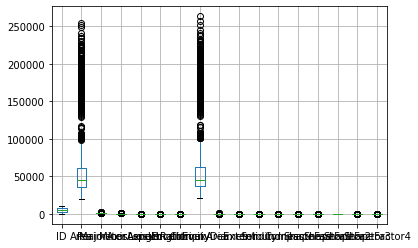

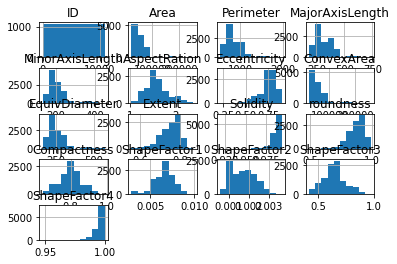

In [397]:
data.boxplot()
data.hist()

                       ID      Area  Perimeter  MajorAxisLength  \
ID               1.000000 -0.006442   0.000679        -0.000639   
Area            -0.006442  1.000000   0.966881         0.933198   
Perimeter        0.000679  0.966881   1.000000         0.977830   
MajorAxisLength -0.000639  0.933198   0.977830         1.000000   
MinorAxisLength -0.003572  0.952536   0.915162         0.830452   
AspectRation     0.004579  0.243893   0.386119         0.548912   
Eccentricity     0.001265  0.268565   0.390878         0.539787   
ConvexArea      -0.006194  0.999940   0.967823         0.933934   
EquivDiameter   -0.002186  0.984987   0.991439         0.962754   
Extent          -0.008626  0.061387  -0.013889        -0.070935   
Solidity        -0.015873 -0.200078  -0.307817        -0.285916   
roundness       -0.015406 -0.354127  -0.543906        -0.589910   
Compactness     -0.003421 -0.270134  -0.407622        -0.566905   
ShapeFactor1    -0.004321 -0.848371  -0.866250        -0.77722

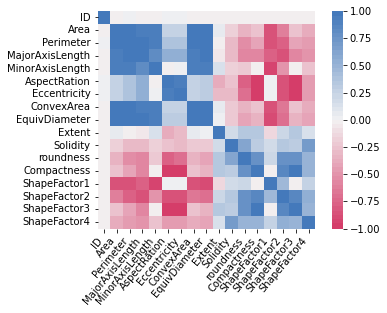

In [398]:
#data Exploration
import seaborn as sns

print(data.corr())

correlationMatrix = data.corr(method = 'pearson')

ax = sns.heatmap(correlationMatrix , vmin = -1 , vmax = 1 , center = 0, cmap = sns.diverging_palette(0,250,n = 50),square = True)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 50,
    horizontalalignment = 'right'
    
);

In [399]:
data.drop(columns=['y']).duplicated().sum()

0

In [400]:
data.y.unique()

array(['HOROZ', 'SEKER', 'DERMASON', 'SIRA', 'BARBUNYA', 'CALI', 'BOMBAY'],
      dtype=object)

<AxesSubplot:>

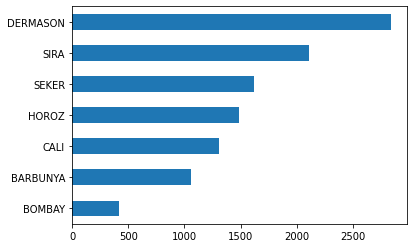

In [401]:
data.y.value_counts().sort_values().plot(kind = 'barh')

In [402]:
data

,ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,y
0,0,58238,971.303,397.202654,186.945510,2.124697,0.882317,58977,272.306674,0.604756,0.987470,0.775723,0.685561,0.006820,0.000929,0.469994,0.998595,HOROZ
1,1,44515,757.601,265.590470,213.967453,1.241266,0.592420,44780,238.071960,0.771745,0.994082,0.974620,0.896387,0.005966,0.002376,0.803510,0.997370,SEKER
2,2,31662,653.783,239.902428,168.421505,1.424417,0.712136,32034,200.781748,0.801407,0.988387,0.930853,0.836931,0.007577,0.002293,0.700453,0.997737,DERMASON
3,3,38778,734.020,268.446281,184.061923,1.458456,0.727925,39208,222.201897,0.766137,0.989033,0.904439,0.827733,0.006923,0.002005,0.685142,0.999250,DERMASON
4,4,42530,775.403,281.212824,193.236878,1.455275,0.726511,43028,232.703412,0.729816,0.988426,0.888895,0.827499,0.006612,0.001912,0.684755,0.996507,SIRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10829,10829,37777,716.007,250.174662,192.704033,1.298233,0.637708,38174,219.315230,0.770519,0.989600,0.925983,0.876648,0.006622,0.002413,0.768513,0.997708,SEKER
10830,10830,32187,667.621,247.778775,165.786862,1.494562,0.743179,32582,202.439525,0.731805,0.987877,0.907466,0.817017,0.007698,0.002116,0.667517,0.997646,DERMASON
10831,10831,81837,1095.937,433.838186,241.527026,1.796230,0.830699,82554,322.797312,0.771996,0.991315,0.856226,0.744050,0.005301,0.001002,0.553610,0.994412,CALI
10832,10832,48212,826.362,309.639462,199.285811,1.553746,0.765357,48777,247.760822,0.677002,0.988417,0.887206,0.800159,0.006422,0.001624,0.640255,0.994793,SIRA


In [403]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import classification_report,f1_score
from sklearn.ensemble import RandomForestClassifier

<AxesSubplot:xlabel='MajorAxisLength', ylabel='EquivDiameter'>

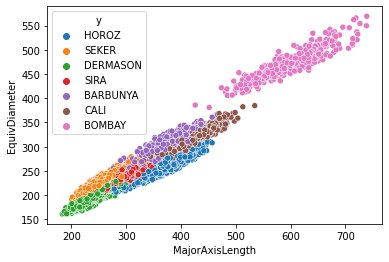

In [404]:
sns.scatterplot(hue='y',x='MajorAxisLength',y='EquivDiameter',data=data)

In [405]:
x = data.drop(['y'],axis=1)
y=data['y']

In [406]:
# train = data
# y=train['y']
# train = train.drop(['y'],axis=1)


# from imblearn.over_sampling import RandomOverSampler 
# ros = RandomOverSampler(random_state=0)
# train, y = ros.fit_resample(train, y)
# from collections import Counter
# print(sorted(Counter(y).items()))

In [407]:
# train.duplicated().sum()

In [408]:
# data.duplicated().sum()

In [409]:
# train = train.apply(np.log)

In [410]:
# from sklearn.preprocessing import StandardScaler
# scaler1 = StandardScaler()
# train1=scaler1.fit_transform(train)

In [411]:
# features = data
# label = data.y
# x_test = test.drop(columns=['ID'],axis = 1)

<AxesSubplot:>

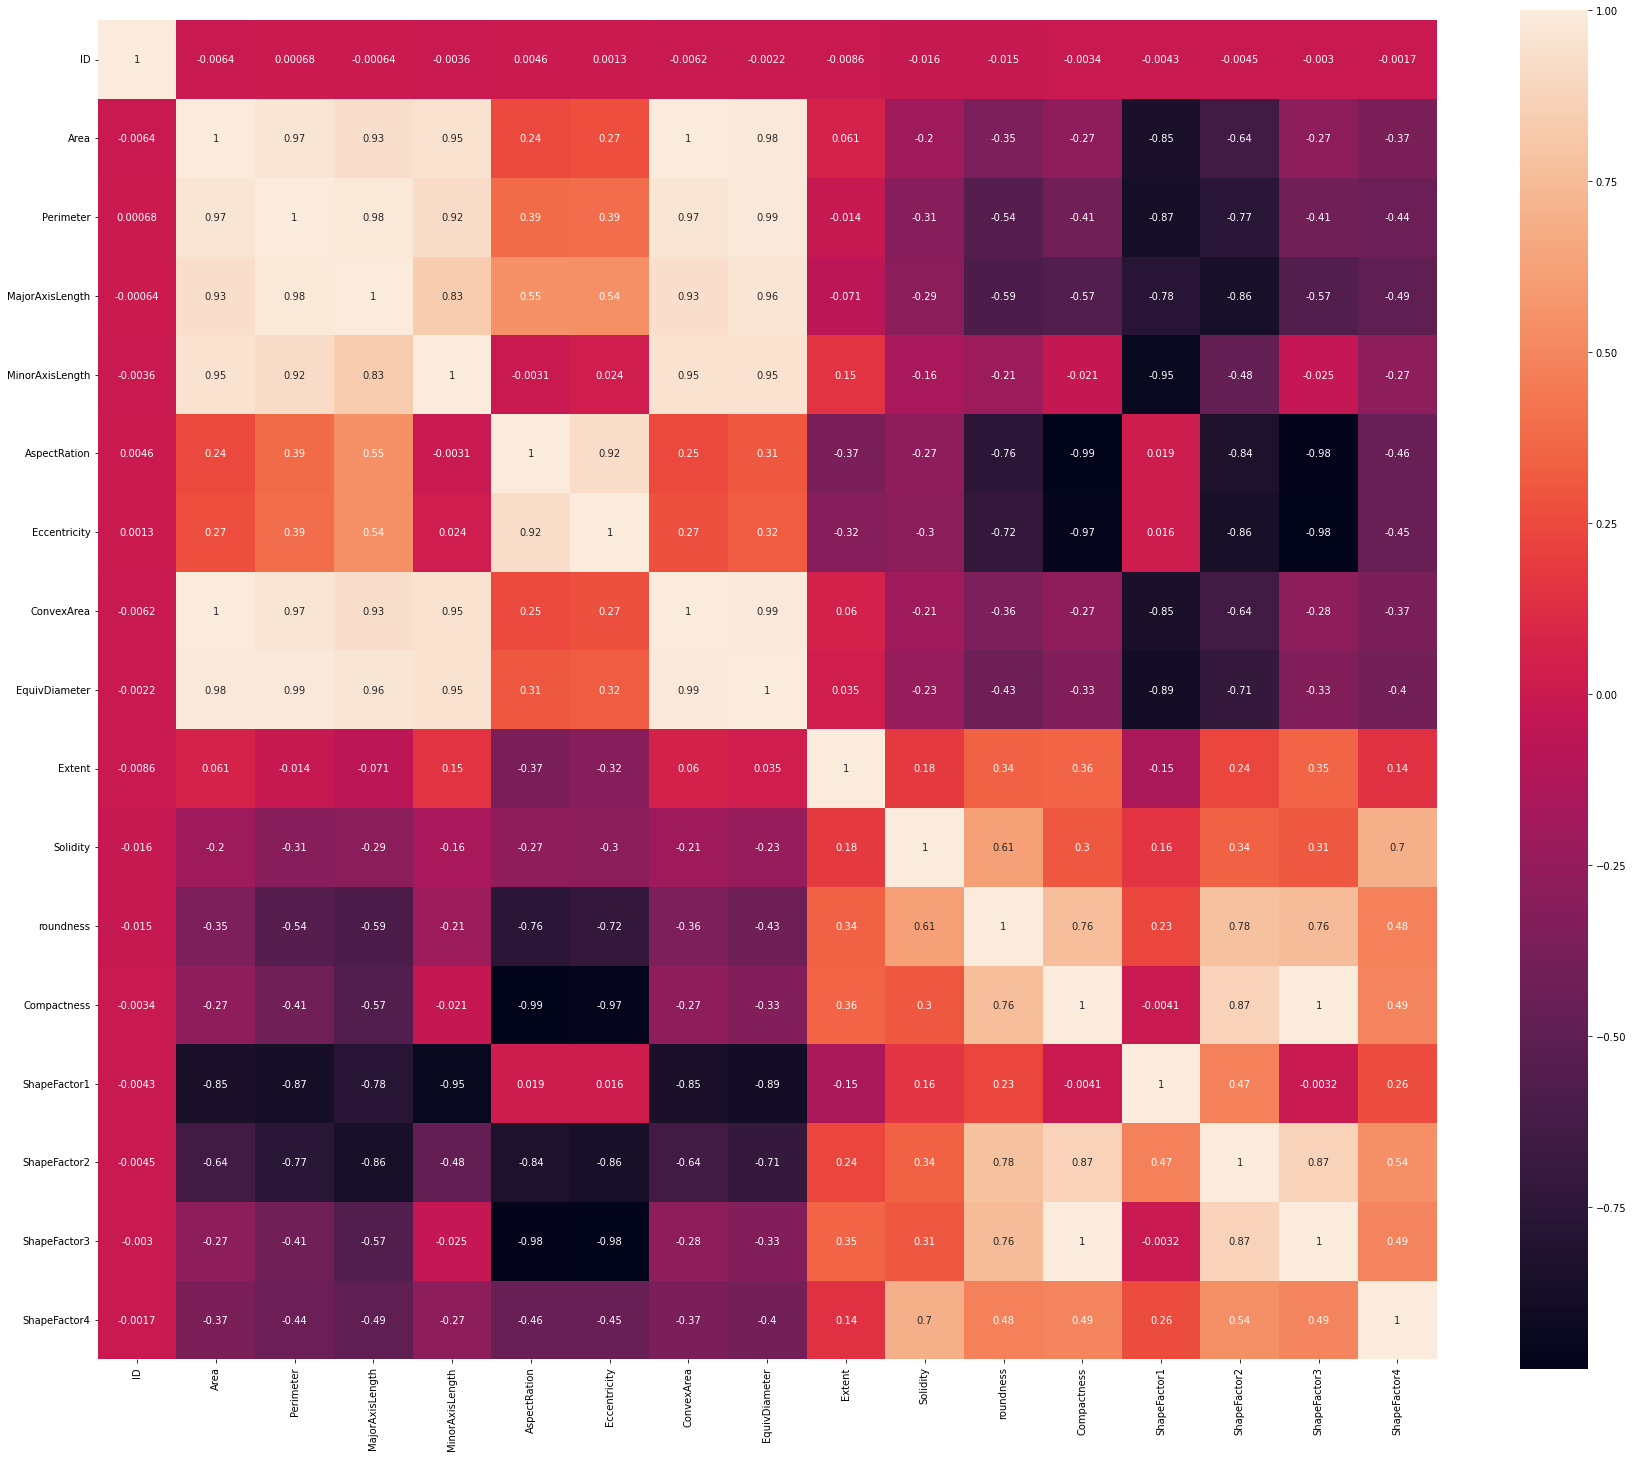

In [412]:
corr = x.corr()
plt.figure(figsize=(30,25))
sns.heatmap(corr,annot = True ,square = True)

In [413]:
x = x.drop(columns=['ConvexArea','ShapeFactor3'],axis = 1)
test = test.drop(columns=['ConvexArea','ShapeFactor3'],axis = 1)

In [414]:
test 

,ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor4
0,10834,57659,955.434,387.757607,196.625782,1.972059,0.861896,270.949661,0.620790,0.957982,0.793735,0.698760,0.006725,0.000989,0.962889
1,10835,28772,630.362,229.990785,159.609367,1.440960,0.719993,191.399185,0.767458,0.987812,0.909913,0.832204,0.007994,0.002365,0.997956
2,10836,54677,911.022,308.853903,226.398571,1.364204,0.680198,263.850182,0.753013,0.978857,0.827860,0.854288,0.005649,0.001856,0.995607
3,10837,24827,578.304,214.192699,147.788172,1.449322,0.723831,177.794033,0.716508,0.988297,0.932871,0.830066,0.008627,0.002526,0.998596
4,10838,141850,1432.847,524.923471,346.910920,1.513136,0.750492,424.981211,0.804617,0.987263,0.868240,0.809606,0.003701,0.000981,0.991803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2704,13538,66833,1018.336,400.397077,214.346215,1.867992,0.844640,291.709476,0.759604,0.985927,0.809876,0.728550,0.005991,0.001041,0.991504
2705,13539,40572,725.331,250.714014,206.471935,1.214276,0.567264,227.283688,0.767479,0.991980,0.969089,0.906546,0.006179,0.002574,0.997923
2706,13540,61226,1008.378,408.227467,199.385082,2.047432,0.872611,279.204879,0.611648,0.958138,0.756657,0.683944,0.006668,0.000900,0.957748
2707,13541,34238,698.847,255.829224,170.867099,1.497241,0.744255,208.789788,0.724890,0.986004,0.880956,0.816130,0.007472,0.002045,0.997263


In [415]:
X = preprocessing.StandardScaler().fit(x).transform(x.astype(float))

test_df2 = preprocessing.StandardScaler().fit(test).transform(test.astype(float))

In [416]:
# from sklearn import preprocessing
# from sklearn.preprocessing import MinMaxScaler
# df_final = x
# col = x.columns
# features = x[col]
# df_final[col] = MinMaxScaler().fit_transform(df_final.values)
# df_final.head()

<AxesSubplot:>

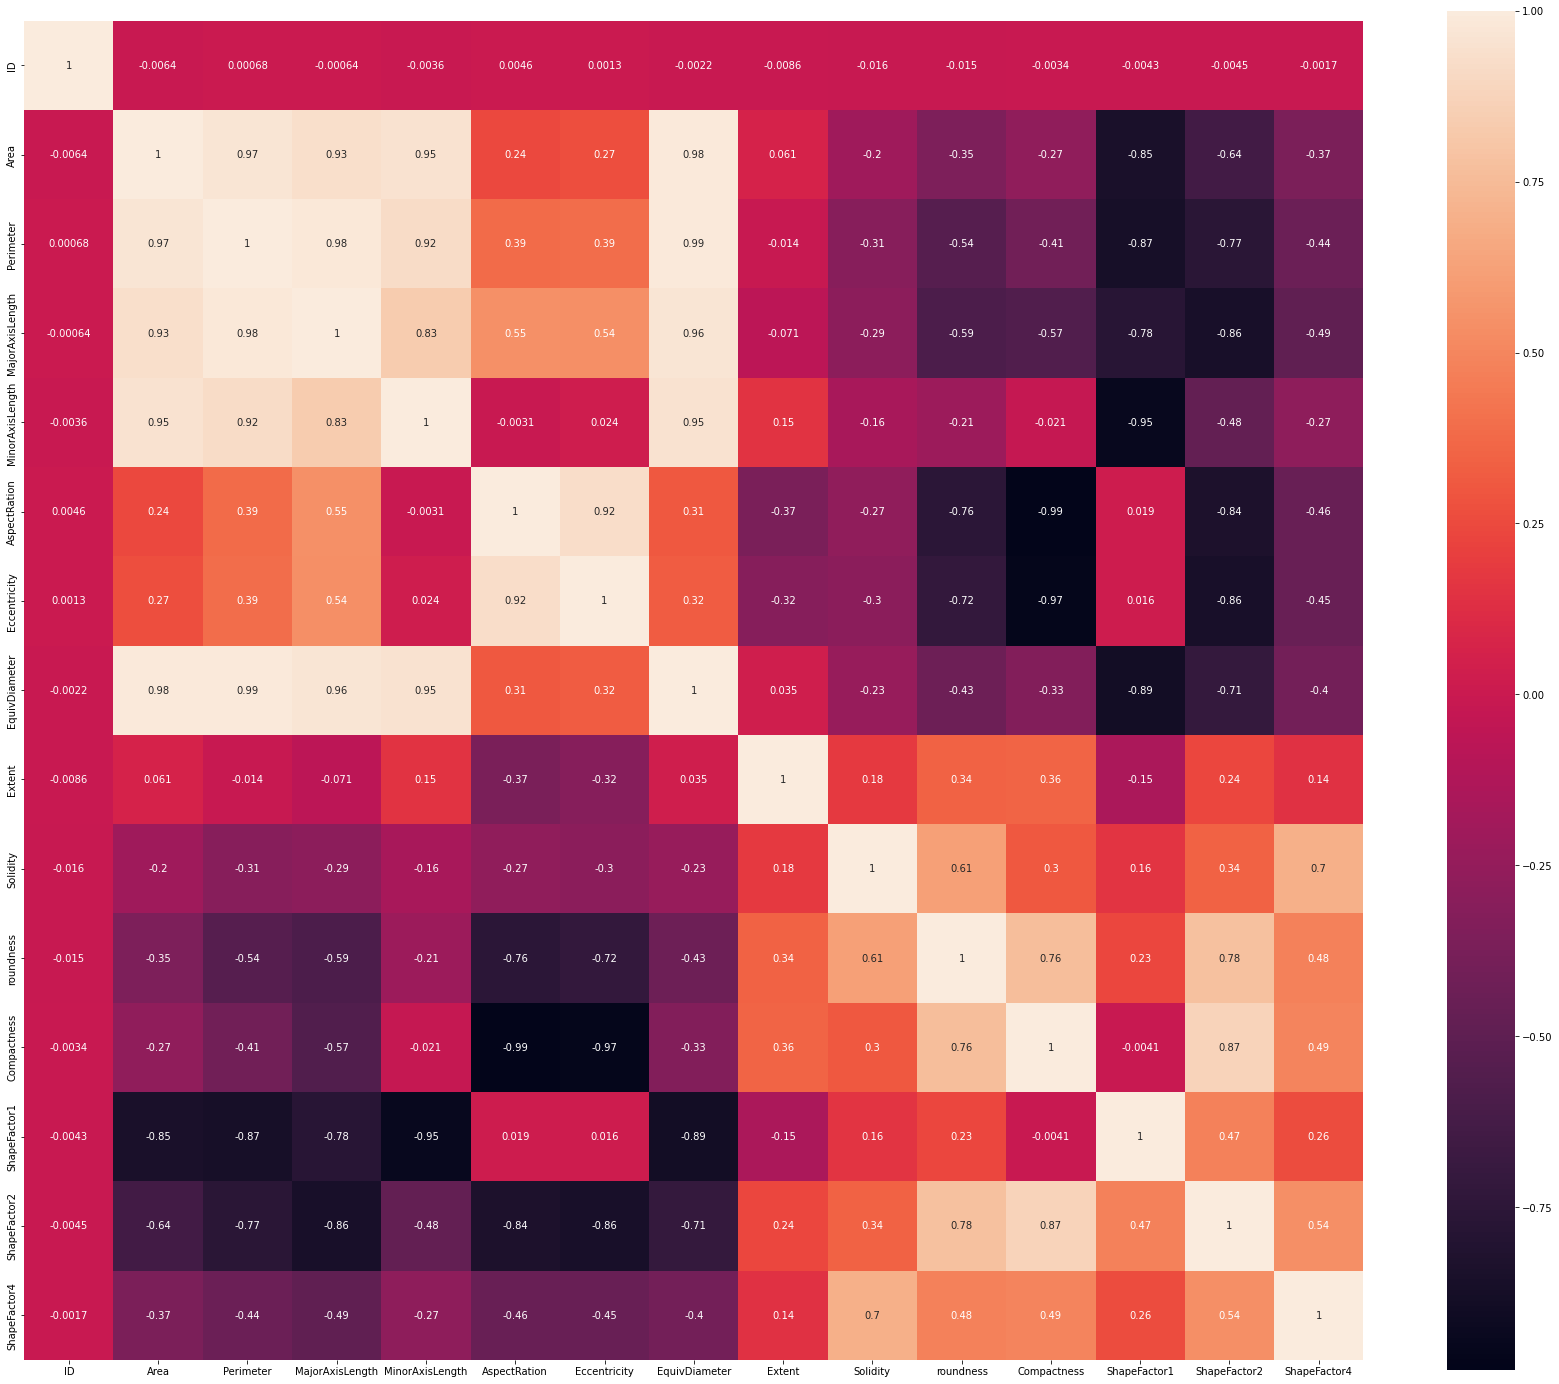

In [417]:
corr = x.corr()
plt.figure(figsize=(30,25))
sns.heatmap(corr,annot = True ,square = True)

In [418]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (8667, 15) (8667,)
Test set: (2167, 15) (2167,)


In [419]:
from sklearn.neighbors import KNeighborsClassifier

k = 7
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)


pred = neigh.predict(X_test)
from sklearn.metrics import classification_report, accuracy_score
print("Train set Accuracy: ", accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", accuracy_score(y_test, pred))

Train set Accuracy:  0.9328487365870544
Test set Accuracy:  0.9247808029533918


In [420]:
from sklearn.svm import SVC

svm_model = SVC()
svm_model.fit(X_train,y_train)

pred2 = svm_model.predict(X_test)
print(np.round(accuracy_score(y_test,pred2),decimals=4))


0.9368


In [421]:
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

    BARBUNYA       0.96      0.94      0.95       232
      BOMBAY       1.00      1.00      1.00        79
        CALI       0.94      0.93      0.93       254
    DERMASON       0.92      0.93      0.93       555
       HOROZ       0.96      0.95      0.96       288
       SEKER       0.96      0.97      0.97       336
        SIRA       0.89      0.90      0.89       423

    accuracy                           0.94      2167
   macro avg       0.95      0.95      0.95      2167
weighted avg       0.94      0.94      0.94      2167



In [422]:
from sklearn import tree
dtree = tree.DecisionTreeClassifier()
dtree = dtree.fit(X_train, y_train)
pred4 = dtree.predict(X_test)
print(classification_report(y_test,pred4))

              precision    recall  f1-score   support

    BARBUNYA       0.90      0.92      0.91       232
      BOMBAY       0.99      1.00      0.99        79
        CALI       0.90      0.87      0.88       254
    DERMASON       0.90      0.88      0.89       555
       HOROZ       0.95      0.92      0.94       288
       SEKER       0.92      0.96      0.94       336
        SIRA       0.84      0.85      0.84       423

    accuracy                           0.90      2167
   macro avg       0.91      0.91      0.91      2167
weighted avg       0.90      0.90      0.90      2167



In [423]:
print(np.round(accuracy_score(y_test,pred4),decimals=4))

0.9003


In [424]:
from sklearn.neighbors import NearestCentroid
ncd = NearestCentroid()
ncd.fit(X_train, y_train)
NearestCentroid()
pred5 = ncd.predict(X_test)
print(classification_report(y_test,pred5))

              precision    recall  f1-score   support

    BARBUNYA       0.94      0.90      0.92       232
      BOMBAY       1.00      1.00      1.00        79
        CALI       0.88      0.88      0.88       254
    DERMASON       0.93      0.86      0.89       555
       HOROZ       0.94      0.91      0.92       288
       SEKER       0.93      0.96      0.94       336
        SIRA       0.79      0.89      0.84       423

    accuracy                           0.90      2167
   macro avg       0.92      0.91      0.91      2167
weighted avg       0.90      0.90      0.90      2167



In [425]:
print(np.round(accuracy_score(y_test,pred5),decimals=4))

0.8985


In [426]:
test_df2


array([[-1.73141156,  0.16673959,  0.47540399, ...,  0.13743114,
        -1.22058079, -7.13820591],
       [-1.73013282, -0.83685306, -1.04616842, ...,  1.24988008,
         1.0588248 ,  0.64218854],
       [-1.72885408,  0.06313889,  0.26752366, ..., -0.80644008,
         0.21538391,  0.12106018],
       ...,
       [ 1.72885408,  0.29066436,  0.72322026, ...,  0.08703865,
        -1.36801364, -8.27903645],
       [ 1.73013282, -0.6469532 , -0.72560901, ...,  0.79257149,
         0.52841081,  0.48854883],
       [ 1.73141156, -0.12801169, -0.11828504, ..., -0.22543442,
        -0.13388091,  0.45150044]])

In [427]:
y_test_predicted = neigh.predict(test_df2)
test['y'] = y_test_predicted

test['y'] = test['y'].astype('object') 

test.head()

,ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor4,y
0,10834,57659,955.434,387.757607,196.625782,1.972059,0.861896,270.949661,0.620790,0.957982,0.793735,0.698760,0.006725,0.000989,0.962889,HOROZ
1,10835,28772,630.362,229.990785,159.609367,1.440960,0.719993,191.399185,0.767458,0.987812,0.909913,0.832204,0.007994,0.002365,0.997956,DERMASON
2,10836,54677,911.022,308.853903,226.398571,1.364204,0.680198,263.850182,0.753013,0.978857,0.827860,0.854288,0.005649,0.001856,0.995607,BARBUNYA
3,10837,24827,578.304,214.192699,147.788172,1.449322,0.723831,177.794033,0.716508,0.988297,0.932871,0.830066,0.008627,0.002526,0.998596,DERMASON
4,10838,141850,1432.847,524.923471,346.910920,1.513136,0.750492,424.981211,0.804617,0.987263,0.868240,0.809606,0.003701,0.000981,0.991803,BOMBAY


In [428]:
test[['ID','y']].to_csv('C:/Users/somay/Downloads/train/submission.csv', index=False)